In [1]:
#used to install a library called python-docx
!pip install python-docx PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.4 MB/s eta 0:00:00


In [2]:
!sudo apt-get install antiword

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (104 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 126441 files and directories currentl

In [3]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/resume_dataset.zip"
extract_path = "/content/drive/MyDrive/resume_dataset_unzipped"

# Create output folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)


Files extracted to: /content/drive/MyDrive/resume_dataset_unzipped


In [5]:
import os
import pandas as pd
import spacy
from collections import Counter
import subprocess
from docx import Document
from docx.opc.exceptions import PackageNotFoundError
import PyPDF2

#os finds the files, docx reads the content from them, and pandas puts it all together into a useful table

In [23]:
# Read .doc file
def read_doc(file_path):
    """Read .doc files using antiword system tool"""
    try:
        result = subprocess.run(['antiword', file_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            return result.stdout
        else:
            print(f"Error reading {file_path}: {result.stderr}")
            return ""
    except FileNotFoundError:
        print("antiword not found. Please make sure it is installed.")
        return ""
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

In [24]:
# Read .docx file
def read_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except PackageNotFoundError:
        print(f"Skipping invalid/corrupted .docx file: {file_path}")
        return ""
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

In [25]:
# Read .pdf file
def read_pdf(file_path):
    """Read .pdf files using PyPDF2"""
    try:
        with open(file_path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = []
            for page in reader.pages:
                text.append(page.extract_text())
            return '\n'.join(text)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

In [27]:
data = []
# Replace with the path to your folder in Google Drive
root_dir = "/content/drive/MyDrive/resume_dataset_unzipped"

In [28]:
if not os.path.exists(root_dir):
    print(f"Error: The directory '{root_dir}' does not exist.")
else:
    for subdir, dirs, files in os.walk(root_dir):
        role = os.path.basename(subdir)

        if role == os.path.basename(root_dir):
            continue

        for file in files:
            file_path = os.path.join(subdir, file)
            ext = file.lower().split('.')[-1]
            text = ""

            # Explicitly check for the problem file and use the .doc reader
            if "Peoplesoft Admin_G Ananda Rayudu" in file:
                print(f"Forcing .doc reader for: {file}")
                text = read_doc(file_path)
            elif ext == 'doc':
                text = read_doc(file_path)
            elif ext == 'docx':
                text = read_docx(file_path)
            elif ext == 'pdf':
                text = read_pdf(file_path)
            else:
                print(f"Skipping unsupported file type: {file_path}")

            if text.strip() != "":
                data.append({'text': text, 'role': role})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)


Forcing .doc reader for: Peoplesoft Admin_G Ananda Rayudu.docx
Forcing .doc reader for: Peoplesoft Admin_G Ananda Rayudu.doc


In [29]:
print("\nFinal DataFrame:")
print(df)


Final DataFrame:
                                                 text               role
0   \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...         Peoplesoft
1     Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft Resume
2   \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  Peoplesoft Resume
3   \n                      PeopleSoft Database Ad...  Peoplesoft Resume
4   Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft Resume
..                                                ...                ...
75  \n      Workday Integration Consultant\n\nName...            workday
76  Seeking suitable positions in Workday HCM  as ...            workday
77  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...            workday
78  \nVenkateswarlu.B                             ...            workday
79                                                ...            workday

[80 rows x 2 columns]


In [31]:
!ls "/content/drive/MyDrive/resume_dataset_unzipped"

'P-561 Dataset'


In [32]:
print("\nFinal DataFrame:")
print(df)


Final DataFrame:
                                                 text               role
0   \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...         Peoplesoft
1     Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft Resume
2   \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  Peoplesoft Resume
3   \n                      PeopleSoft Database Ad...  Peoplesoft Resume
4   Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft Resume
..                                                ...                ...
75  \n      Workday Integration Consultant\n\nName...            workday
76  Seeking suitable positions in Workday HCM  as ...            workday
77  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...            workday
78  \nVenkateswarlu.B                             ...            workday
79                                                ...            workday

[80 rows x 2 columns]


In [33]:
print(df.head())

                                                text               role
0  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...         Peoplesoft
1    Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft Resume
2  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  Peoplesoft Resume
3  \n                      PeopleSoft Database Ad...  Peoplesoft Resume
4  Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft Resume


In [34]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd

In [35]:
try:
    nltk.download('stopwords', quiet=True)
except Exception:
    print("NLTK stopwords download failed. Please check your connection.")

In [36]:
df_cleaned = df.copy()

In [37]:
df_cleaned.dropna(inplace=True)
print("Removed rows with missing values.")

Removed rows with missing values.


In [38]:
def clean_text(text):
    # Regex for emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Regex for URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Regex for US phone numbers (can be adjusted for other formats)
    text = re.sub(r'(\+?\d{1,2})?[\s.-]?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}', '', text)
    return text

In [39]:
df_cleaned['text'] = df_cleaned['text'].apply(clean_text)
print("Removed emails, URLs, and phone numbers.")

Removed emails, URLs, and phone numbers.


In [40]:
stop_words = set(stopwords.words('english'))

In [41]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [42]:
df_cleaned['text'] = df_cleaned['text'].apply(remove_stopwords)
print("Removed stop words.")

Removed stop words.


In [43]:
print("\n--- Cleaned DataFrame ---")
pd.set_option('display.max_colwidth', 500) # To see more of the text content
print(df_cleaned.head())


--- Cleaned DataFrame ---
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  Profile Summary: • 7+ years experience implementing, upgrading, supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions Portal IHUB • Expertise installation, configuration, setup, security management PeopleSoft Internet Architecture PIA environment. • In-depth experience analysis, planning, development, implementation stages, including load testing, quality assurance, tuning. • Gained extensive expos

In [44]:
# Load the spaCy English language model
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model loaded successfully.")
except Exception as e:
    print(f"Error loading spaCy model: {e}")
    print("Please make sure you have run the installation and download commands.")


spaCy model loaded successfully.


In [45]:
df_processed = df_cleaned.copy()

In [46]:
def final_clean_text(text):
    # Remove all punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [47]:
df_processed['content_final'] = df_processed['text'].apply(final_clean_text)
print("Punctuation and extra whitespace removed.")

Punctuation and extra whitespace removed.


In [48]:
def count_numbers(text):
    # Regex to find any sequence of digits
    return len(re.findall(r'\d+', text))

In [49]:
df_processed['number_count'] = df_processed['content_final'].apply(count_numbers)
print("Number count added to DataFrame.")

Number count added to DataFrame.


In [50]:
# Function to get named entities from text
def get_named_entities(text):
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return entities

In [51]:
# This may take a few minutes depending on the size of your dataset
df_processed['named_entities'] = df_processed['content_final'].apply(get_named_entities)


In [52]:
# Get a flattened list of all entities
all_entities = [entity for sublist in df_processed['named_entities'] for entity in sublist]


In [53]:
# Count the most common entities
top_entities = Counter(all_entities).most_common(15)


In [54]:
print("\n--- Top Named Entities ---")
print(top_entities)


--- Top Named Entities ---
[('ORG', 2525), ('DATE', 615), ('PERSON', 563), ('CARDINAL', 332), ('PRODUCT', 115), ('WORK_OF_ART', 113), ('GPE', 100), ('NORP', 65), ('FAC', 51), ('ORDINAL', 21), ('LAW', 18), ('LOC', 8), ('EVENT', 4), ('QUANTITY', 4), ('LANGUAGE', 3)]


In [55]:
# Display the first few rows of the updated DataFrame
print("\n--- DataFrame with New Columns ---")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)
print(df_processed[['role', 'content_final']])


--- DataFrame with New Columns ---
                 role  \
0          Peoplesoft   
1   Peoplesoft Resume   
2   Peoplesoft Resume   
3   Peoplesoft Resume   
4   Peoplesoft Resume   
..                ...   
75            workday   
76            workday   
77            workday   
78            workday   
79            workday   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          content_final  
0   Profile Summary 7 years experience implementing upgrading supporting PeopleSoft database administration including Human Capital Management HCM Financials

In [56]:
df_entities = df_cleaned.copy()

In [57]:
def extract_filtered_entities(text):
    doc = nlp(text)
    # Filter for interesting entity types like PERSON, ORG, GPE
    # We convert to lowercase to handle variations (e.g., 'Google' vs 'google')
    entities = [ent.text.lower() for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]
    return entities

In [58]:
print("Extracting entities. This may take a moment...")
df_entities['extracted_entities'] = df_entities['text'].apply(extract_filtered_entities)


Extracting entities. This may take a moment...


In [59]:
all_entities = [entity for sublist in df_entities['extracted_entities'] for entity in sublist]


In [60]:
common_names_to_exclude = ['experience', 'inc', 'university', 'llc', 'corporation', 'b.e.']
all_entities = [entity for entity in all_entities if entity not in common_names_to_exclude]


In [61]:

top_entities = Counter(all_entities).most_common(20)

print("\n--- Top 20 Most Common Specific Entities ---")
print(top_entities)


--- Top 20 Most Common Specific Entities ---
[('peoplesoft', 185), ('eib', 82), ('sql', 43), ('javascript', 39), ('xslt', 28), ('bootstrap', 27), ('tuxedo', 25), ('css', 25), ('react', 23), ('xml', 23), ('html5', 22), ('india', 21), ('html', 21), ('ssis', 21), ('picof', 20), ('workday studio', 20), ('application engine', 19), ('hcm', 19), ('process scheduler', 18), ('application', 18)]


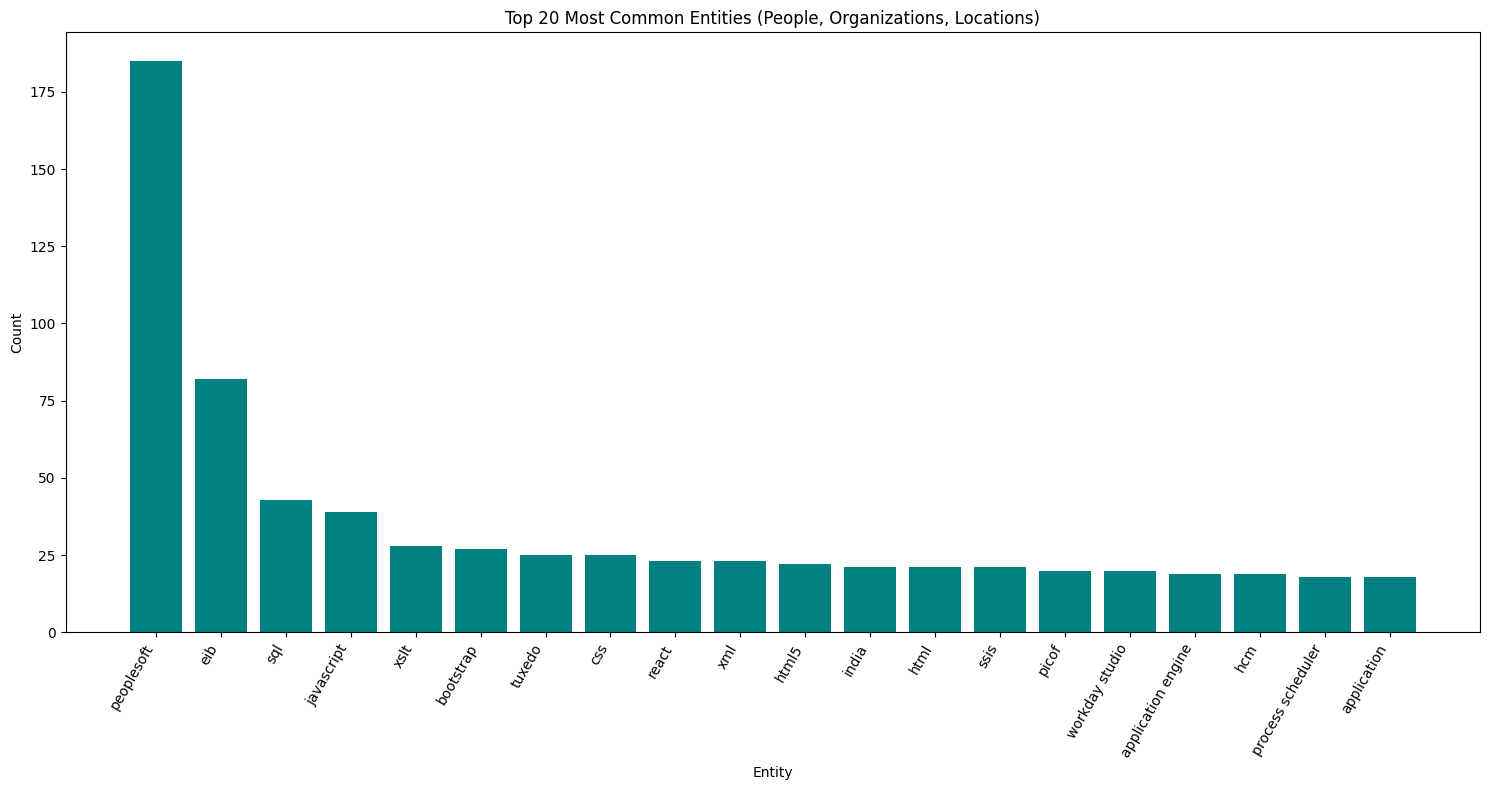

In [62]:
import matplotlib.pyplot as plt

labels, values = zip(*top_entities)
plt.figure(figsize=(15, 8))
plt.bar(labels, values, color='teal')
plt.title('Top 20 Most Common Entities (People, Organizations, Locations)')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

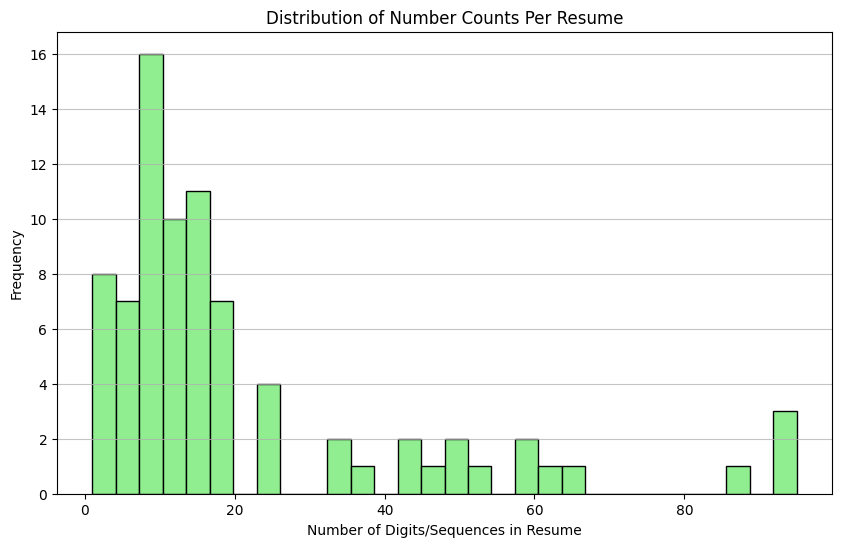

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df_processed['number_count'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Number Counts Per Resume')
plt.xlabel('Number of Digits/Sequences in Resume')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [64]:
import matplotlib.pyplot as plt

In [65]:
category_counts = df_cleaned['role'].value_counts()

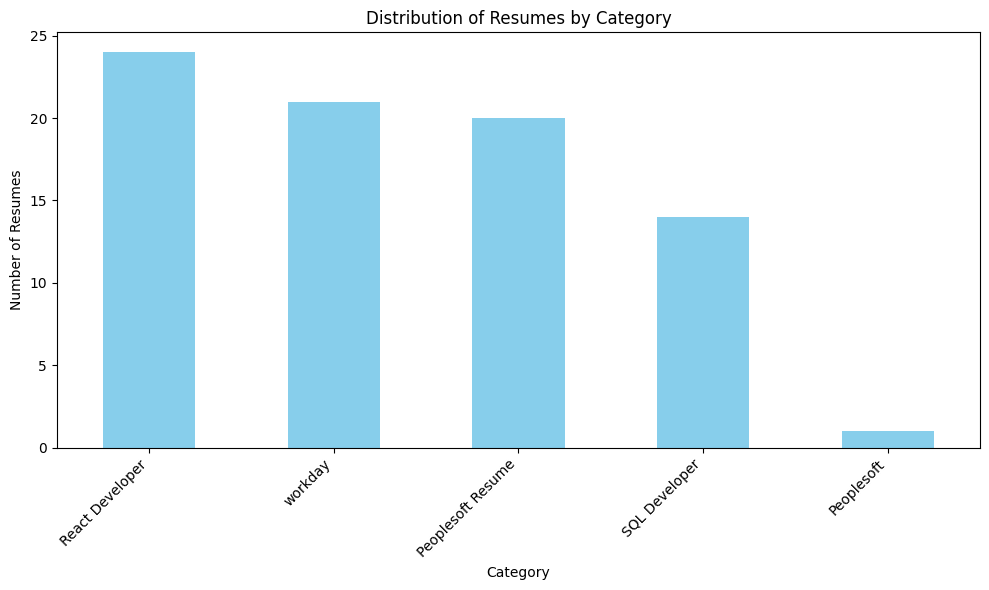

In [66]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Resumes by Category')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
category_counts = df_cleaned['role'].value_counts()

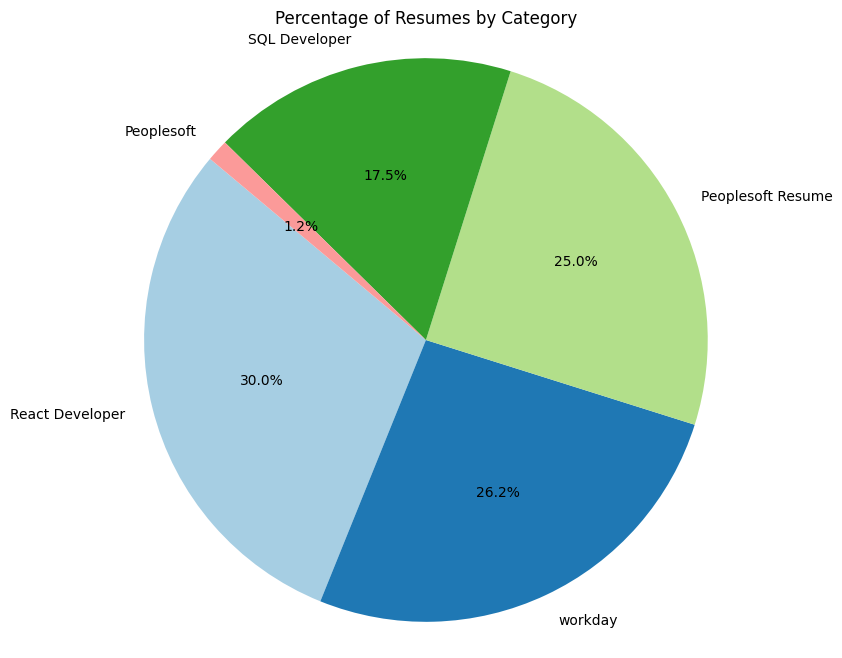

In [68]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Resumes by Category')
plt.axis('equal') # Ensures the pie chart is circular.
plt.show()

In [69]:
import seaborn as sns

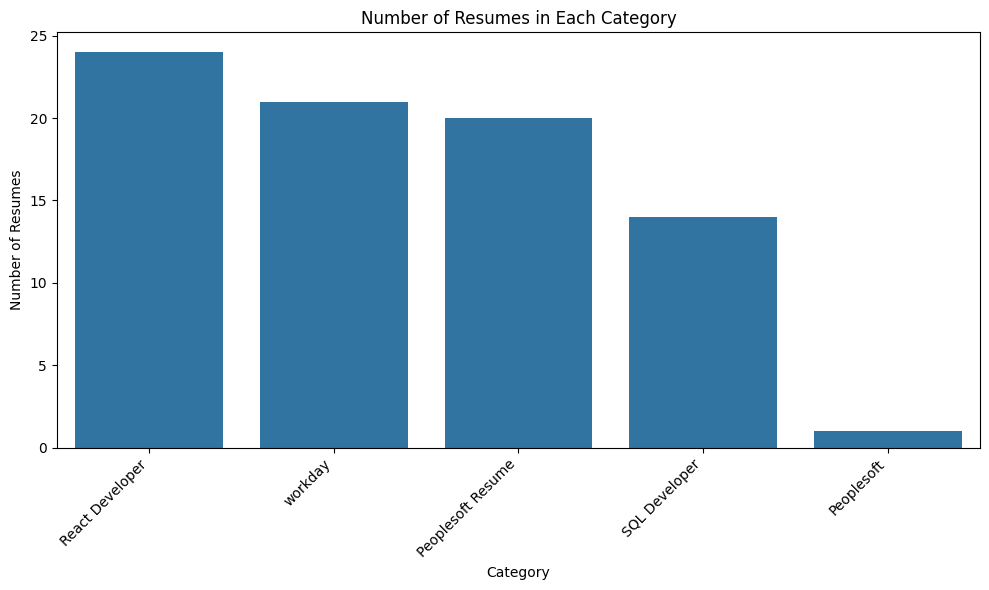

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='role', data=df_cleaned, order=df['role'].value_counts().index)
plt.title('Number of Resumes in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
df = df_processed[['content_final', 'role']].copy()

In [73]:
print("--- Preparing the Data ---")
# 1. Split the data into features (X) and target (y)
# X is the text content, and y is the category/role
X = df['content_final']
y = df['role']


--- Preparing the Data ---


In [74]:
# Assuming you have your raw text data in a variable called `text_data`
# and the corresponding labels in a variable called `labels`.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 1: Split your original data into training and testing sets.
# This is the most crucial step to ensure X and y remain aligned.
# Assuming you have a DataFrame named 'df' with 'content' and 'role' columns
# Let's say you've already performed some preprocessing on the content
# and stored it in a new variable.

# This is the step that was likely missing
content_final = df['content_final']
role = df['role']

# Now the train_test_split function will work because both variables are defined
X_train, X_test, y_train, y_test = train_test_split(content_final, role, test_size=0.3, random_state=57)


# Step 2: Initialize the TF-IDF vectorizer.
vectorizer = TfidfVectorizer()

# Step 3: Fit the vectorizer on the training data and transform it.
# This creates a feature matrix with the same number of rows as X_train.
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 4: Initialize and train your logistic regression model.
# Now, X_train_tfidf and y_train have the same number of samples, so the fit() method will work.
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)

# Optional: Transform the test data to evaluate the model
X_test_tfidf = vectorizer.transform(X_test)

In [75]:
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train_tfidf: (56, 4200)
Shape of y_train: (56,)


In [76]:
print("\n--- Training and Evaluating Models ---")


--- Training and Evaluating Models ---


In [77]:
# --- Model 1: Logistic Regression ---
# Logistic Regression is a simple, fast, and highly interpretable linear model.
# It's an excellent starting point and a good baseline to compare more complex models against.
print("\n--- Training Logistic Regression Model ---")
#This is a simple, linear model that serves as an excellent starting point.
#It's fast to train and easy to interpret, making it a great baseline for comparison.
#It assumes a linear relationship between your words and the resume category.


--- Training Logistic Regression Model ---


In [78]:
log_reg_model = LogisticRegression(max_iter=1000)


In [79]:
log_reg_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [80]:
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

In [81]:
print("\n--- Evaluation: Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


--- Evaluation: Logistic Regression ---
Classification Report:
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.67      0.80         6
  React Developer       0.62      1.00      0.77         5
    SQL Developer       1.00      0.80      0.89         5
          workday       1.00      1.00      1.00         8

         accuracy                           0.88        24
        macro avg       0.91      0.87      0.86        24
     weighted avg       0.92      0.88      0.88        24

Confusion Matrix:
[[4 2 0 0]
 [0 5 0 0]
 [0 1 4 0]
 [0 0 0 8]]


In [82]:
# --- Model 2: Support Vector Machine (SVC) ---
# An SVC finds the best hyperplane to separate different classes.
# It is very powerful and often performs well on text classification tasks.
print("\n--- Training Support Vector Machine (SVC) Model ---")
#A more powerful and complex model that finds the best hyperplane to separate your resume data points into different categories.
#It is highly effective in high-dimensional spaces, which is perfect for text data.


--- Training Support Vector Machine (SVC) Model ---


In [83]:
svm_model = SVC(kernel='linear') # 'linear' kernel is common for text data


In [84]:
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [85]:
y_pred_svm = svm_model.predict(X_test_tfidf)

In [86]:
print("\n--- Evaluation: Support Vector Machine ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


--- Evaluation: Support Vector Machine ---
Classification Report:
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         6
  React Developer       0.83      1.00      0.91         5
    SQL Developer       1.00      0.80      0.89         5
          workday       1.00      1.00      1.00         8

         accuracy                           0.96        24
        macro avg       0.96      0.95      0.95        24
     weighted avg       0.97      0.96      0.96        24

Confusion Matrix:
[[6 0 0 0]
 [0 5 0 0]
 [0 1 4 0]
 [0 0 0 8]]


In [87]:
# --- Model 3: Random Forest Classifier ---
# A Random Forest is an ensemble method that builds multiple decision trees.
# It is very robust and can handle complex, non-linear relationships in the data.
print("\n--- Training Random Forest Model ---")
#An ensemble model that builds multiple decision trees. It is highly robust to noisy data and is effective at capturing complex, non-linear patterns.
# It can provide a more powerful and often more accurate solution than a single linear model.


--- Training Random Forest Model ---


In [88]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
rf_model.fit(X_train_tfidf, y_train)



RandomForestClassifier(random_state=42)

In [90]:
y_pred_rf = rf_model.predict(X_test_tfidf)

In [91]:
print("\n--- Evaluation: Random Forest Classifier ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


--- Evaluation: Random Forest Classifier ---
Classification Report:
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.50      0.67         6
  React Developer       0.56      1.00      0.71         5
    SQL Developer       1.00      0.80      0.89         5
          workday       1.00      1.00      1.00         8

         accuracy                           0.83        24
        macro avg       0.89      0.82      0.82        24
     weighted avg       0.91      0.83      0.83        24

Confusion Matrix:
[[3 3 0 0]
 [0 5 0 0]
 [0 1 4 0]
 [0 0 0 8]]


In [92]:
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [93]:
# 3. Filter out empty strings to create the 'filtered' variables
# This is the step that creates the variable y_train_filtered
X_train_filtered = X_train[X_train.str.strip().astype(bool)]
y_train_filtered = y_train[X_train_filtered.index]

In [94]:
print("\n--- Training Naive Bayes Classifier Model ---")
# Naive Bayes is a simple, probabilistic classifier that is great for text data.
# It is very fast and efficient.
nb_model = MultinomialNB()





--- Training Naive Bayes Classifier Model ---


In [95]:
nb_model.fit(X_train_tfidf, y_train_filtered)


MultinomialNB()

In [96]:
y_pred_nb = nb_model.predict(X_test_tfidf)

In [97]:
print("\n--- Evaluation: Naive Bayes Classifier ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_nb))




--- Evaluation: Naive Bayes Classifier ---
Classification Report:
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         6
  React Developer       0.71      1.00      0.83         5
    SQL Developer       1.00      0.60      0.75         5
          workday       1.00      1.00      1.00         8

         accuracy                           0.92        24
        macro avg       0.93      0.90      0.90        24
     weighted avg       0.94      0.92      0.91        24

Confusion Matrix:
[[6 0 0 0]
 [0 5 0 0]
 [0 2 3 0]
 [0 0 0 8]]


In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [99]:
print("--- Building the Pipeline ---")
# 1. Split the data into features (X) and target (y)
X = df_processed['content_final']
y = df_processed['role']


--- Building the Pipeline ---


In [100]:
# 2. Encode the string labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [101]:
# 3. Split the data into training and testing sets using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [102]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 56 samples
Testing set size: 24 samples


In [103]:
# 4. Create the Pipeline for Logistic Regression
# We'll use a simpler pipeline for a cleaner demonstration
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('log_reg', LogisticRegression(random_state=10, max_iter=1000))
])

In [104]:
# --- Section for Parameter Tuning ---
print("\n--- Hyperparameter Tuning using Grid Search ---")

# Define the parameter grid to search
param_grid = {
    'tfidf__max_features': [2000, 5000, 10000],
    'log_reg__C': [0.1, 1, 10, 100]
}


--- Hyperparameter Tuning using Grid Search ---


In [105]:
# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=2000)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=10))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 1, 10, 100],
                         'tfidf__max_features': [2000, 5000, 10000]},
             verbose=1)

In [106]:
# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters found: {'log_reg__C': 1, 'tfidf__max_features': 2000}
Best cross-validation score: 0.9825


In [107]:
best_pipeline = grid_search.best_estimator_

In [108]:
# 5. Train the best pipeline on the entire training data (already done by GridSearchCV)
print("\n--- Training the Pipeline ---")
best_pipeline.fit(X_train, y_train)


--- Training the Pipeline ---


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2000)),
                ('log_reg',
                 LogisticRegression(C=1, max_iter=1000, random_state=10))])

In [109]:
# 6. Make predictions on the test data
y_pred = best_pipeline.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 2, 1, 4, 1, 1, 2, 2, 4, 2, 4, 3, 4, 4, 3, 2, 1, 4,
       1, 2])

In [110]:
# 7. Evaluate the pipeline's performance
print("\n--- Evaluating Pipeline Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


--- Evaluating Pipeline Performance ---
Classification Report:
                   precision    recall  f1-score   support

       Peoplesoft       0.00      0.00      0.00         1
Peoplesoft Resume       0.86      1.00      0.92         6
  React Developer       0.78      1.00      0.88         7
    SQL Developer       1.00      0.50      0.67         4
          workday       1.00      1.00      1.00         6

         accuracy                           0.88        24
        macro avg       0.73      0.70      0.69        24
     weighted avg       0.86      0.88      0.85        24

Confusion Matrix:
[[0 1 0 0 0]
 [0 6 0 0 0]
 [0 0 7 0 0]
 [0 0 2 2 0]
 [0 0 0 0 6]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
import joblib
import pickle

In [112]:
# --- Model Deployment: Saving the Pipeline and Label Encoder ---
print("\n--- Saving the Trained Model and Label Encoder ---")


--- Saving the Trained Model and Label Encoder ---


In [113]:
pipeline_filename = 'resume_classifier_log_reg_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(best_pipeline, file)
print(f"Pipeline saved to '{pipeline_filename}'")


Pipeline saved to 'resume_classifier_log_reg_pipeline.pkl'


In [114]:
label_encoder_filename = 'label_encoder_log_reg.joblib'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label encoder saved to '{label_encoder_filename}'")

Label encoder saved to 'label_encoder_log_reg.joblib'


In [115]:
# --- Example of Loading and Using the Saved Model for Deployment ---
print("\n--- Loading the Saved Model for Prediction ---")


--- Loading the Saved Model for Prediction ---


In [116]:
loaded_pipeline = joblib.load(pipeline_filename)
loaded_label_encoder = joblib.load(label_encoder_filename)

In [117]:
new_resume_text = "I have experience in database management, SQL queries, and data warehousing."


In [118]:
prediction_encoded = loaded_pipeline.predict([new_resume_text])
predicted_role = loaded_label_encoder.inverse_transform(prediction_encoded)[0]

# **Streamlit Deployment**


In [119]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.8 MB/s eta 0:00:00


In [120]:
import streamlit as st
import joblib
import pickle
import warnings
from docx import Document
from PyPDF2 import PdfReader

warnings.filterwarnings('ignore')

In [121]:
# --- Load the saved pipeline and label encoder ---

@st.cache_resource
def load_model():
    """
    Loads the trained model pipeline and label encoder from the saved files.
    This function is cached to prevent reloading the model on every user interaction.
    """
    try:
        # Load the pipeline with pickle
        with open('resume_classifier_log_reg_pipeline.pkl', 'rb') as file:
            loaded_pipeline = pickle.load(file)

        # Load the label encoder with joblib
        loaded_label_encoder = joblib.load('label_encoder_log_reg.joblib')

        return loaded_pipeline, loaded_label_encoder
    except FileNotFoundError:
        st.error("Error: The model files were not found. Please ensure 'resume_classifier_log_reg_pipeline.pkl' and 'label_encoder_log_reg.joblib' are in the same directory.")
        return None, None

pipeline, label_encoder = load_model()

2025-09-30 02:27:45.591 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.090 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-30 02:27:46.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:27:46.173 Thread 'MainThread': mi

In [122]:
# --- Helper function to read file content ---
def get_text_from_file(file):
    """
    Extracts text from different file types.
    """
    file_extension = file.name.split('.')[-1].lower()

    if file_extension == 'docx':
        doc = Document(file)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)

    elif file_extension == 'pdf':
        reader = PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text

    elif file_extension == 'txt':
        return file.read().decode('utf-8')

    return ""


In [123]:
# --- Create the Streamlit App UI ---
st.set_page_config(page_title="Resume Classifier", layout="centered")

st.title("Resume Classifier App")
st.markdown("Upload a resume file below to get the predicted job role.")
st.markdown("---")

2025-09-30 02:28:17.120 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:17.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [124]:
if pipeline and label_encoder:
    # File uploader for user input
    uploaded_file = st.file_uploader(
        "Upload a Resume File",
        type=['docx', 'pdf', 'txt'],
        help="Supported formats: .docx, .pdf, .txt"
    )

    if st.button("Predict Role"):
        if uploaded_file is not None:
            try:
                # Get text from the uploaded file
                resume_text = get_text_from_file(uploaded_file)

                if resume_text.strip(): # Check if text is not empty
                    # Use the loaded pipeline to make a prediction
                    prediction_encoded = pipeline.predict([resume_text])

                    # Use the label encoder to get the human-readable class name
                    predicted_role = label_encoder.inverse_transform(prediction_encoded)[0]

                    st.success(f"**Predicted Job Role:** {predicted_role}")
                else:
                    st.warning("The uploaded file appears to be empty or unreadable. Please try a different file.")
            except Exception as e:
                st.error(f"An error occurred during prediction: {e}")
        else:
            st.warning("Please upload a file to get a prediction.")
else:
    st.error("The application could not load the necessary model files. Please check your file paths.")


2025-09-30 02:28:21.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-30 02:28:21.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar